# Persiapan Dataset, Tokenize Data, Inisialsasi Model, Training Model, Menyimpan Model

In [0]:
import random
import numpy as np
import pandas as pd

%tensorflow_version 2.x
import tensorflow
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.layers import Input, Dense, Embedding, Flatten, Dropout
from tensorflow.python.keras.layers import SpatialDropout1D
from tensorflow.python.keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.python.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_excel('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/indo jawa sunda new-old preprocessing pseudo label.xlsx')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253019 entries, 0 to 253018
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   cleanText  253019 non-null  object
 1   label      253019 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [0]:
df = df.dropna()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253019 entries, 0 to 253018
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   cleanText  253019 non-null  object
 1   label      253019 non-null  object
dtypes: object(2)
memory usage: 5.8+ MB


In [0]:
df.label.value_counts()

indo     121704
sunda     65959
jawa      65356
Name: label, dtype: int64

In [0]:
# The maximum number of words to be used. (most frequent)
vocab = 142871
# Max number of words in each complaint.
max_length = 259
# This is fixed.
embedding_dim = 64

#token = ["saya ingin belajar bahasa"]

tokenizer = Tokenizer(num_words=vocab, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
#tokenizer.fit_on_texts(df['cleanText'].values)
tokenizer.fit_on_texts(df['cleanText'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

maxx = max([len(tokenizer.word_index)]) + 1
maxlen1 = max([len(i.split()) for i in df['cleanText'].values])
#print(tokenizer.word_index)
print(maxlen1)
print(maxx)

Found 142870 unique tokens.
259
142871


In [0]:
word_index

In [0]:
X = tokenizer.texts_to_sequences(df['cleanText'].values)
X = pad_sequences(X, maxlen=max_length)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (253019, 259)


In [0]:
Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (253019, 3)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, shuffle= True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(189764, 259) (189764, 3)
(63255, 259) (63255, 3)


In [0]:
print(X_test.shape, Y_test.shape)

(63255, 259) (63255, 3)


In [0]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Bidirectional, LSTM, TimeDistributed, GRU, GlobalMaxPooling1D, Activation, GlobalAveragePooling1D
from tensorflow.keras.utils import plot_model

In [0]:
def blstm_model():
  model = Sequential()
  model.add(Embedding(vocab, embedding_dim, input_length=max_length))
  #model.add(Dropout(0.5))
  model.add(Bidirectional(LSTM(128)))
  model.add(Dense(3, activation='softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def cnn_model():
  model = Sequential()
  model.add(Embedding(vocab, embedding_dim, input_length=max_length))
  #model.add(Dropout(0.5))
  model.add(Conv1D(128, 3, padding='valid', activation='relu', strides=1))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(128))
  #model.add(Dropout(0.5))
  model.add(Activation('relu'))
  model.add(Dense(3))
  model.add(Activation('softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def blstm_cnn_model():
  model = Sequential()
  model.add(Embedding(vocab, embedding_dim, input_length=max_length))
  #model.add(Dropout(0.5))
  model.add(Conv1D(128, 3, padding='valid', activation='relu', strides=1))
  model.add(MaxPooling1D(3))
  model.add(Dense(128))
  #model.add(Dropout(0.5))
  model.add(Activation('relu'))
  model.add(Bidirectional(LSTM(128)))
  model.add(Dense(3))
  model.add(Activation('softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
  
def gru_model():
  model = Sequential()
  model.add(Embedding(vocab, embedding_dim, input_length=max_length))
  model.add(GRU(128))
  #model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def gru_cnn_model():
  model = Sequential()
  model.add(Embedding(vocab, embedding_dim, input_length=max_length))
  #model.add(Dropout(0.5))
  model.add(Conv1D(128, 3, padding='valid', activation='relu', strides=1))
  model.add(MaxPooling1D(3))
  model.add(Dense(128))
  #model.add(Dropout(0.5))
  model.add(Activation('relu'))
  model.add(GRU(128))
  model.add(Dense(3))
  model.add(Activation('softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
from timeit import default_timer as timer

class TimingCallback(tensorflow.keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

In [0]:
from tensorflow.python.keras.callbacks import EarlyStopping

epochs = 6
batch_size = 64

blstm_time = TimingCallback()
history_blstm = blstm_model().fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,callbacks=[blstm_time])
print("\ntotal waktu model blstm = ", sum(blstm_time.logs), "detik atau ", int(str(sum(blstm_time.logs)/60)[:2]),"Menit ", int(float(str(sum(blstm_time.logs)/60)[1:])*60),"detik" )

cnn_time = TimingCallback()
history_cnn = cnn_model().fit(X_train, Y_train, epochs=epochs, batch_size=32, validation_split=0.2,callbacks=[cnn_time])
print("\ntotal waktu model cnn = ", sum(cnn_time.logs), "detik atau ", int(str(sum(cnn_time.logs)/60)[:1]),"Menit ", int(float(str(sum(cnn_time.logs)/60)[1:])*60),"detik" )

blstmc_time = TimingCallback()
history_blstmc = blstm_cnn_model().fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,callbacks=[blstmc_time])
print("\ntotal waktu model blstm-c = ", sum(blstmc_time.logs), "detik atau ", int(str(sum(blstmc_time.logs)/60)[:2]),"Menit ", int(float(str(sum(blstmc_time.logs)/60)[1:])*60),"detik" )

gru_time = TimingCallback()
history_gru = gru_model().fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,callbacks=[gru_time])
print("\ntotal waktu model gru = ", sum(gru_time.logs), "detik atau ", int(str(sum(gru_time.logs)/60)[:2]),"Menit ", int(float(str(sum(gru_time.logs)/60)[1:])*60),"detik" )

gruc_time = TimingCallback()
history_gruc = gru_cnn_model().fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,callbacks=[gruc_time])
print("\ntotal waktu model gru-c = ", sum(gruc_time.logs), "detik atau ", int(str(sum(gruc_time.logs)/60)[:2]),"Menit ", int(float(str(sum(gruc_time.logs)/60)[1:])*60),"detik" )


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 259, 64)           9143744   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               197632    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 9,342,147
Trainable params: 9,342,147
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
2373/2373 [==============================] - 286s 121ms/step - loss: 0.0349 - accuracy: 0.9876 - val_loss: 0.0057 - val_accuracy: 0.9984
Epoch 2/6
2373/2373 [==============================] - 286s 121ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0121 - val_accuracy: 0.9965
Epoch 3/6
2373/2373 [==============================] - 288s 121ms/step - loss: 0.0

In [0]:
accr = history_blstm.model.evaluate(X_test,Y_test)
print('Test set blstm\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
accr1 = history_cnn.model.evaluate(X_test,Y_test)
print('Test set cnn\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))
accr2 = history_blstmc.model.evaluate(X_test,Y_test)
print('Test set blstmc\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr2[0],accr2[1]))
accr3 = history_gru.model.evaluate(X_test,Y_test)
print('Test set gru\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr3[0],accr3[1]))
accr4 = history_gruc.model.evaluate(X_test,Y_test)
print('Test set gruc\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr4[0],accr4[1]))

1977/1977 [==============================] - 22s 11ms/step - loss: 0.0064 - accuracy: 0.9984
Test set blstm
  Loss: 0.006
  Accuracy: 0.998
1977/1977 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9979
Test set cnn
  Loss: 0.016
  Accuracy: 0.998
1977/1977 [==============================] - 13s 7ms/step - loss: 0.0255 - accuracy: 0.9950
Test set blstmc
  Loss: 0.026
  Accuracy: 0.995
1977/1977 [==============================] - 12s 6ms/step - loss: 0.0078 - accuracy: 0.9979
Test set gru
  Loss: 0.008
  Accuracy: 0.998
1977/1977 [==============================] - 9s 5ms/step - loss: 0.0205 - accuracy: 0.9952
Test set gruc
  Loss: 0.020
  Accuracy: 0.995


In [0]:
# serialize weights to HDF5
history_blstm.model.save("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/Skenario baru/Skenario 1/Skenario 1 Blstm model.h5")
history_cnn.model.save("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/Skenario baru/Skenario 1/Skenario 1 CNN model.h5")
history_blstmc.model.save("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/Skenario baru/Skenario 1/Skenario 1 Blstm-C model.h5")
history_gru.model.save("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/Skenario baru/Skenario 1/Skenario 1 Gru model.h5")
history_gruc.model.save("/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/CODE/Skenario baru/Skenario 1/Skenario 1 Gru-C model.h5")
print("Saved model to disk")

Saved model to disk


# Plot Tingkat Akurasi dan Loss dari Proses Pelatihan

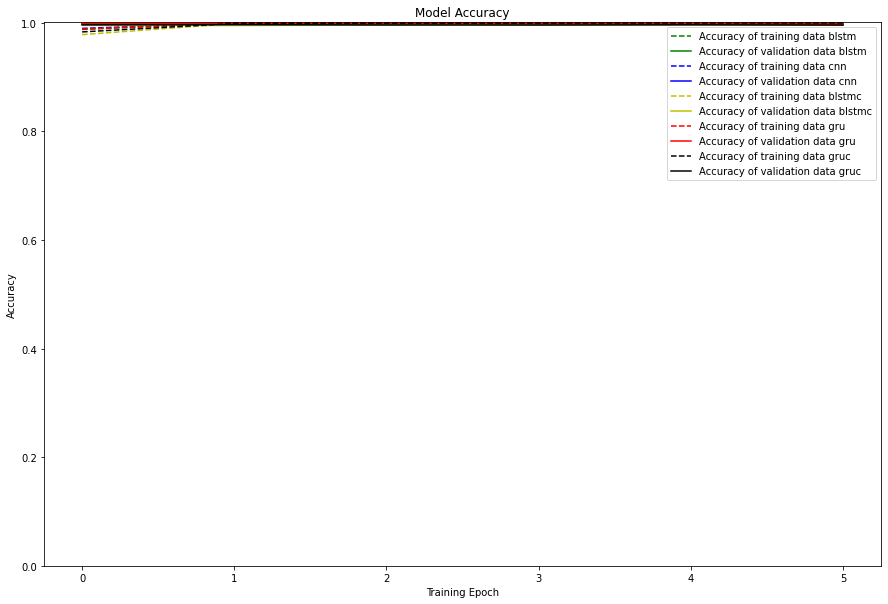

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(history_blstm.history['accuracy'], "g--", label="Accuracy of training data blstm")
plt.plot(history_blstm.history['val_accuracy'], "g", label="Accuracy of validation data blstm")

plt.plot(history_cnn.history['accuracy'], "b--", label="Accuracy of training data cnn")
plt.plot(history_cnn.history['val_accuracy'], "b", label="Accuracy of validation data cnn")

plt.plot(history_blstmc.history['accuracy'], "y--", label="Accuracy of training data blstmc")
plt.plot(history_blstmc.history['val_accuracy'], "y", label="Accuracy of validation data blstmc")

plt.plot(history_gru.history['accuracy'], "r--", label="Accuracy of training data gru")
plt.plot(history_gru.history['val_accuracy'], "r", label="Accuracy of validation data gru")

plt.plot(history_gruc.history['accuracy'], "k--", label="Accuracy of training data gruc")
plt.plot(history_gruc.history['val_accuracy'], "k", label="Accuracy of validation data gruc")

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


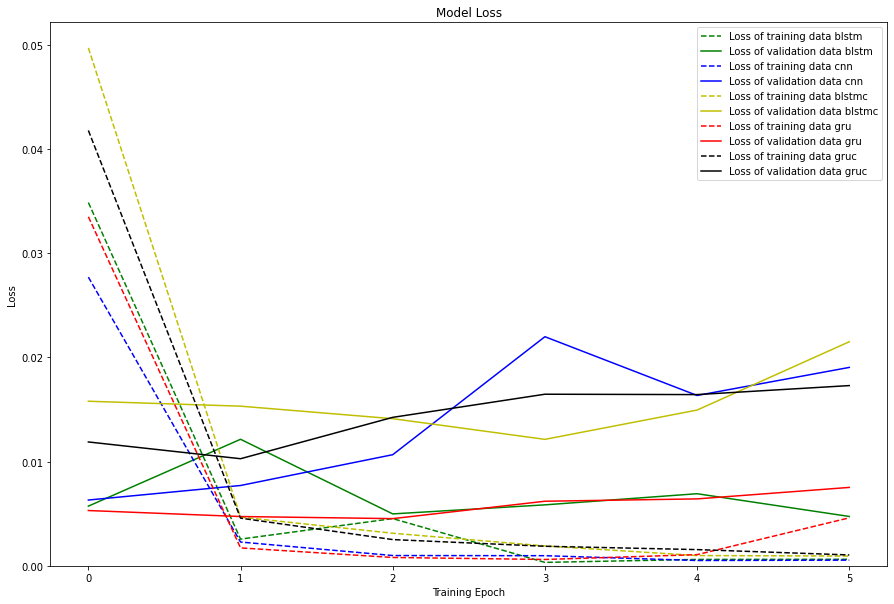

In [0]:
plt.figure(figsize=(15, 10))
plt.plot(history_blstm.history['loss'], "g--", label="Loss of training data blstm")
plt.plot(history_blstm.history['val_loss'], "g", label="Loss of validation data blstm")

plt.plot(history_cnn.history['loss'], "b--", label="Loss of training data cnn")
plt.plot(history_cnn.history['val_loss'], "b", label="Loss of validation data cnn")

plt.plot(history_blstmc.history['loss'], "y--", label="Loss of training data blstmc")
plt.plot(history_blstmc.history['val_loss'], "y", label="Loss of validation data blstmc")

plt.plot(history_gru.history['loss'], "r--", label="Loss of training data gru")
plt.plot(history_gru.history['val_loss'], "r", label="Loss of validation data gru")

plt.plot(history_gruc.history['loss'], "k--", label="Loss of training data gruc")
plt.plot(history_gruc.history['val_loss'], "k", label="Loss of validation data gruc")

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Mencoba Mengidentifikasi Bahasa Beberapa Kalimat

In [0]:
def prediksiku(data):
  jumlah_data = len(data)
  seq = tokenizer.texts_to_sequences(data)
  padded = pad_sequences(seq, maxlen=max_length)
  pred= history_blstm.model.predict(padded)
  pred1 = history_cnn.model.predict(padded)
  pred2 = history_blstmc.model.predict(padded)
  pred3 = history_gru.model.predict(padded)
  pred4 = history_gruc.model.predict(padded)
  labels = ['Indo','Jawa', 'Sunda']

  for z in range(jumlah_data):
      print(data[z], '\n-Teridentifikasi sebagai bahasa : ')
      print(' blstm  : ',labels[np.argmax(pred[z])], pred[z])
      print(' cnn    : ',labels[np.argmax(pred1[z])], pred1[z])
      print(' blstmc : ',labels[np.argmax(pred2[z])], pred2[z])
      print(' gru    : ',labels[np.argmax(pred3[z])], pred3[z])
      print(' gruc   : ',labels[np.argmax(pred4[z])], pred4[z], '\n\n')


In [0]:
new_text = ['rubrik jagad jawa ugi kababar ing koran saben dinten kemis',
            'cakrik iku diprecaya dadi dadi pralambang tumrap pangarep arep becik',
            'garuda digambarake nduwe awak emas arupa putih lan suwiwi werna abang',
            'kayata parang kusumo sing mujudake bathik tuwa dhewe ing nuswantara',
            'bathik minangka salah sawijining asil kabudayan sing adi luhung wus kawentar nganti tekan mancanagara',
            'bathik yaiku lembaran kain utawa bakal sing nduweni motif utawa corak maneka rupa',
            'sanadyan dudu saka ponorogo reyog solo uga kerep ditanggap ing maneka warna adicara',
            'pentas reyog dimaknani minangka seni tradhisi adiluhung sing edipeni lan kudu diuri uri',
            'sanadyan dudu wong ponorogo akeh sutresna budaya ing sing seneng marang reyog',
            'awit saka iku reyog bisa disinau lan ngrembaka nganti tekan nagara manca',]

prediksiku(new_text)        

rubrik jagad jawa ugi kababar ing koran saben dinten kemis 
-Teridentifikasi sebagai bahasa : 
 blstm  :  Jawa [1.8356129e-06 9.9999678e-01 1.3757876e-06]
 cnn    :  Jawa [5.083082e-18 1.000000e+00 7.771225e-20]
 blstmc :  Jawa [7.6749251e-07 9.9999821e-01 1.0708387e-06]
 gru    :  Jawa [3.5440502e-07 9.9999964e-01 9.9673167e-09]
 gruc   :  Jawa [2.1631352e-07 9.9999964e-01 1.2841453e-07] 


cakrik iku diprecaya dadi dadi pralambang tumrap pangarep arep becik 
-Teridentifikasi sebagai bahasa : 
 blstm  :  Jawa [2.3514713e-07 9.9999952e-01 2.1486360e-07]
 cnn    :  Jawa [1.0420944e-31 1.0000000e+00 1.2390388e-31]
 blstmc :  Jawa [2.3941337e-07 9.9999905e-01 6.7541328e-07]
 gru    :  Jawa [1.3190501e-09 1.0000000e+00 2.6798846e-10]
 gruc   :  Jawa [5.4991592e-08 9.9999988e-01 1.6296642e-07] 


garuda digambarake nduwe awak emas arupa putih lan suwiwi werna abang 
-Teridentifikasi sebagai bahasa : 
 blstm  :  Jawa [1.6210881e-05 9.9997818e-01 5.6424583e-06]
 cnn    :  Jawa [1.0449611e-15 

In [0]:
new_text = ['Innalillahiwainnailaihirajiun. Sugeng tindak kagem Pak De Didi Prasetyo alias Didi Kempot']

prediksiku(new_text)  

Innalillahiwainnailaihirajiun. Sugeng tindak kagem Pak De Didi Prasetyo alias Didi Kempot 
-Teridentifikasi sebagai bahasa : 
 blstm  :  Jawa [6.8752615e-06 9.9998856e-01 4.4914395e-06]
 cnn    :  Jawa [1.2440199e-18 1.0000000e+00 1.0692197e-22]
 blstmc :  Jawa [2.8137435e-06 9.9999583e-01 1.3556651e-06]
 gru    :  Jawa [6.5727744e-07 9.9999928e-01 1.9655426e-09]
 gruc   :  Jawa [1.3863018e-05 9.9998581e-01 3.9212802e-07] 




In [0]:
new_text = ['Aya gagak maling déngdéng ti pamoean. Geleber hiber bari ngaheumheum déngdéng tea kana tangkal dadap sisi lembur.',
            'Kabeneran harita katangeneun ku anjing nu kacida kabitaeunana da puguh kabeukina',
            'Kusabab kitu, ku anjing disampeurkeun. Tapi sanggaus anjing aya dihandapeun, boro-boro ditanya teu di reret-reret acan',
            'Leuh aya manuk alus-alus teuing. Pamatukna panjang bulu hideung tapi mani lemes kitu.',
            'Ceuk pikirna pasti usahana hasil. Ceuk pikirna deui naon hesena muji-muji keur ngahontal kahayangna',
            'Lamun daekeun mah hayang nyobat jeung manuk nu sakitu lucuna. Ngan rumasa sorangan mah sato hina',
            'Saumur-umur kudu ngadunungan, sare digolodog, rajeun manggih hakaneun oge pasesaan',
            'Gagak nu hanjakaleun mah teu ditolih.',
            'Sababaraha jongjonan gagak teh cindekul we dina dahan bari ngararasakeun teu ngeunahna ku kalakuan anjing',
            'Manehna karek ngarti yen anjing muji bébéakan teh hayang dengdeng nu keur diheumheum ku manehna',]

prediksiku(new_text)  

Aya gagak maling déngdéng ti pamoean. Geleber hiber bari ngaheumheum déngdéng tea kana tangkal dadap sisi lembur. 
-Teridentifikasi sebagai bahasa : 
 blstm  :  Sunda [8.4173280e-06 2.3202267e-06 9.9998927e-01]
 cnn    :  Sunda [6.6723874e-34 2.5732921e-31 1.0000000e+00]
 blstmc :  Sunda [9.6085834e-08 1.8058904e-06 9.9999809e-01]
 gru    :  Sunda [3.1749492e-09 3.5197558e-09 1.0000000e+00]
 gruc   :  Sunda [1.5691711e-08 2.2194463e-06 9.9999774e-01] 


Kabeneran harita katangeneun ku anjing nu kacida kabitaeunana da puguh kabeukina 
-Teridentifikasi sebagai bahasa : 
 blstm  :  Sunda [3.3008791e-06 6.4073873e-07 9.9999607e-01]
 cnn    :  Sunda [4.2498929e-26 1.7381376e-23 1.0000000e+00]
 blstmc :  Sunda [2.9993367e-07 5.0718613e-06 9.9999464e-01]
 gru    :  Sunda [1.1252347e-09 1.9713597e-09 1.0000000e+00]
 gruc   :  Sunda [1.6783186e-07 5.1458837e-06 9.9999464e-01] 


Kusabab kitu, ku anjing disampeurkeun. Tapi sanggaus anjing aya dihandapeun, boro-boro ditanya teu di reret-reret aca

# Confusion Matrix

In [0]:
import seaborn as sn
from sklearn import metrics

LABELS1 = ["Indonesia", "Jawa", "Sunda"]

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sn.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS1,
                yticklabels=LABELS1,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



--- Confusion matrix for test data of model blstm ---



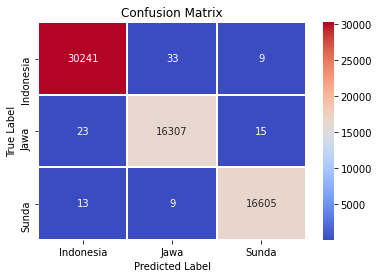


--- Classification report for test data of model blstm ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30283
           1       1.00      1.00      1.00     16345
           2       1.00      1.00      1.00     16627

    accuracy                           1.00     63255
   macro avg       1.00      1.00      1.00     63255
weighted avg       1.00      1.00      1.00     63255

Accuracy: 0.9983874792506521
F1 score: 0.9982939599774244
Recall: 0.9983216880541196
Precision: 0.9982662507987939

--- Confusion matrix for test data of model cnn ---



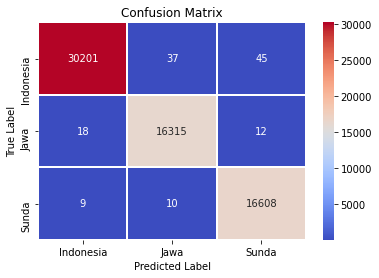


--- Classification report for test data of model cnn ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30283
           1       1.00      1.00      1.00     16345
           2       1.00      1.00      1.00     16627

    accuracy                           1.00     63255
   macro avg       1.00      1.00      1.00     63255
weighted avg       1.00      1.00      1.00     63255

Accuracy: 0.9979290174689748
F1 score: 0.9978538692716047
Recall: 0.9981046889337076
Precision: 0.9976046456335751

--- Confusion matrix for test data of model blstmc ---



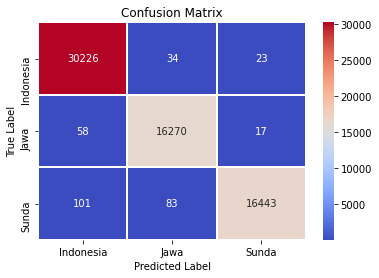


--- Classification report for test data of model blstmc ---

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     30283
           1       0.99      1.00      0.99     16345
           2       1.00      0.99      0.99     16627

    accuracy                           1.00     63255
   macro avg       1.00      0.99      0.99     63255
weighted avg       1.00      1.00      1.00     63255

Accuracy: 0.9950043474824125
F1 score: 0.9946028305373514
Recall: 0.9941542862533433
Precision: 0.9950668687326002

--- Confusion matrix for test data of model gru ---



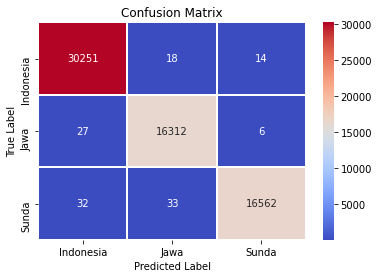


--- Classification report for test data of model gru ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30283
           1       1.00      1.00      1.00     16345
           2       1.00      1.00      1.00     16627

    accuracy                           1.00     63255
   macro avg       1.00      1.00      1.00     63255
weighted avg       1.00      1.00      1.00     63255

Accuracy: 0.9979448264959292
F1 score: 0.9977901500691715
Recall: 0.9976716771112607
Precision: 0.9979101775687148

--- Confusion matrix for test data of model gruc ---



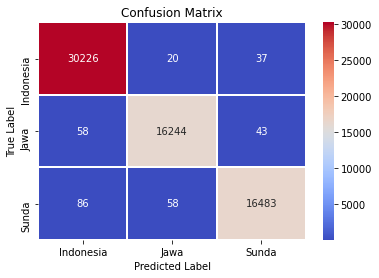


--- Classification report for test data of model gruc ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30283
           1       1.00      0.99      0.99     16345
           2       1.00      0.99      0.99     16627

    accuracy                           1.00     63255
   macro avg       1.00      0.99      0.99     63255
weighted avg       1.00      1.00      1.00     63255

Accuracy: 0.9952256738597739
F1 score: 0.9948191699762963
Recall: 0.9944259612889952
Precision: 0.9952165365903521


In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, \
    accuracy_score, f1_score

print("\n--- Confusion matrix for test data of model blstm ---\n")

y_pred_test = history_blstm.model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(Y_test, axis=1)
df1 = pd.DataFrame({'yp': max_y_pred_test, 'yt': max_y_test})
show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data of model blstm ---\n")
print(classification_report(max_y_test, max_y_pred_test))
print('Accuracy:', accuracy_score(max_y_test, max_y_pred_test))
print('F1 score:', f1_score(max_y_test, max_y_pred_test, average='macro'))
print('Recall:', recall_score(max_y_test, max_y_pred_test, average='macro'))
print('Precision:', precision_score(max_y_test, max_y_pred_test, average='macro'))

print("\n--- Confusion matrix for test data of model cnn ---\n")

y_pred_test2 = history_cnn.model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test2 = np.argmax(y_pred_test2, axis=1)
max_y_test2 = np.argmax(Y_test, axis=1)
df12 = pd.DataFrame({'yp': max_y_pred_test2, 'yt': max_y_test2})
show_confusion_matrix(max_y_test2, max_y_pred_test2)

# %%

print("\n--- Classification report for test data of model cnn ---\n")
print(classification_report(max_y_test2, max_y_pred_test2))
print('Accuracy:', accuracy_score(max_y_test2, max_y_pred_test2))
print('F1 score:', f1_score(max_y_test2, max_y_pred_test2, average='macro'))
print('Recall:', recall_score(max_y_test2, max_y_pred_test2, average='macro'))
print('Precision:', precision_score(max_y_test2, max_y_pred_test2, average='macro'))

print("\n--- Confusion matrix for test data of model blstmc ---\n")

y_pred_test3 = history_blstmc.model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test3 = np.argmax(y_pred_test3, axis=1)
max_y_test3 = np.argmax(Y_test, axis=1)
df13 = pd.DataFrame({'yp': max_y_pred_test3, 'yt': max_y_test3})
show_confusion_matrix(max_y_test3, max_y_pred_test3)

# %%

print("\n--- Classification report for test data of model blstmc ---\n")
print(classification_report(max_y_test3, max_y_pred_test3))
print('Accuracy:', accuracy_score(max_y_test3, max_y_pred_test3))
print('F1 score:', f1_score(max_y_test3, max_y_pred_test3, average='macro'))
print('Recall:', recall_score(max_y_test3, max_y_pred_test3, average='macro'))
print('Precision:', precision_score(max_y_test3, max_y_pred_test3, average='macro'))

print("\n--- Confusion matrix for test data of model gru ---\n")

y_pred_test4 = history_gru.model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test4 = np.argmax(y_pred_test4, axis=1)
max_y_test4 = np.argmax(Y_test, axis=1)
df14 = pd.DataFrame({'yp': max_y_pred_test4, 'yt': max_y_test4})
show_confusion_matrix(max_y_test4, max_y_pred_test4)

# %%

print("\n--- Classification report for test data of model gru ---\n")
print(classification_report(max_y_test4, max_y_pred_test4))
print('Accuracy:', accuracy_score(max_y_test4, max_y_pred_test4))
print('F1 score:', f1_score(max_y_test4, max_y_pred_test4, average='macro'))
print('Recall:', recall_score(max_y_test4, max_y_pred_test4, average='macro'))
print('Precision:', precision_score(max_y_test4, max_y_pred_test4, average='macro'))

print("\n--- Confusion matrix for test data of model gruc ---\n")

y_pred_test5 = history_gruc.model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test5 = np.argmax(y_pred_test5, axis=1)
max_y_test5 = np.argmax(Y_test, axis=1)
df15 = pd.DataFrame({'yp': max_y_pred_test5, 'yt': max_y_test5})
show_confusion_matrix(max_y_test5, max_y_pred_test5)

# %%

print("\n--- Classification report for test data of model gruc ---\n")
print(classification_report(max_y_test5, max_y_pred_test5))
print('Accuracy:', accuracy_score(max_y_test5, max_y_pred_test5))
print('F1 score:', f1_score(max_y_test5, max_y_pred_test5, average='macro'))
print('Recall:', recall_score(max_y_test5, max_y_pred_test5, average='macro'))
print('Precision:', precision_score(max_y_test5, max_y_pred_test5, average='macro'))

# Mencoba memprediksi suatu kalimat menggunakan suatu dataset dengan model yang telah dibangun


In [0]:
def prediksi_blstm(str1):
  str1 = [str1]
  seq = tokenizer.texts_to_sequences(str1)
  padded = pad_sequences(seq, maxlen=max_length)
  pred = history_blstm.model.predict(padded)
  labels = ['Indo','Jawa','Sunda']
  str1 = labels[np.argmax(pred)]
  return str1

def prediksi_cnn(str1):
  str1 = [str1]
  seq = tokenizer.texts_to_sequences(str1)
  padded = pad_sequences(seq, maxlen=max_length)
  pred = history_cnn.model.predict(padded)
  labels = ['Indo','Jawa','Sunda']
  str1 = labels[np.argmax(pred)]
  return str1

def prediksi_blstmc(str1):
  str1 = [str1]
  seq = tokenizer.texts_to_sequences(str1)
  padded = pad_sequences(seq, maxlen=max_length)
  pred = history_blstmc.model.predict(padded)
  labels = ['Indo','Jawa','Sunda']
  str1 = labels[np.argmax(pred)]
  return str1

def prediksi_gru(str1):
  str1 = [str1]
  seq = tokenizer.texts_to_sequences(str1)
  padded = pad_sequences(seq, maxlen=max_length)
  pred = history_gru.model.predict(padded)
  labels = ['Indo','Jawa','Sunda']
  str1 = labels[np.argmax(pred)]
  return str1

def prediksi_gruc(str1):
  str1 = [str1]
  seq = tokenizer.texts_to_sequences(str1)
  padded = pad_sequences(seq, maxlen=max_length)
  pred = history_gruc.model.predict(padded)
  labels = ['Indo','Jawa','Sunda']
  str1 = labels[np.argmax(pred)]
  return str1

In [0]:
def try_model():
  df0 = pd.read_excel('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/jawa test.xlsx')
  df0.cleanText = df0.cleanText.astype(str)
  df0['blstm'] = df0['cleanText'].apply(prediksi_blstm)
  df0['cnn'] = df0['cleanText'].apply(prediksi_cnn)
  df0['blstmc'] = df0['cleanText'].apply(prediksi_blstmc)
  df0['gru'] = df0['cleanText'].apply(prediksi_gru)
  df0['gruc'] = df0['cleanText'].apply(prediksi_gruc)

  df0.assign(cleanText=df0['blstm'])
  df0.assign(cleanText1=df0['cnn'])
  df0.assign(cleanText2=df0['blstmc'])
  df0.assign(cleanText3=df0['gru'])
  df0.assign(cleanText4=df0['gruc'])

  writer = pd.ExcelWriter('/content/drive/Shared drives/TA-NLP/WAHYU DWI AMIRULLAH - 15523222/DATASET/Skenario 3/jawa test skenario 3.xlsx')
  df0.to_excel(writer, 'Sheet1')
  writer.save()

In [0]:
try_model()